In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import plotly as py
import cufflinks as cf
import plotly.offline as pyo
import plotly.graph_objs as go
cf.go_offline(connected=True)
from matplotlib import font_manager, rc
import scipy.stats as stats
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [3]:
data0 = pd.read_excel("광역지자체 일별 이동통신 데이터 목적지 검색 2020.xlsx")
data0

,날짜,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,...,Unnamed: 359,Unnamed: 360,Unnamed: 361,Unnamed: 362,Unnamed: 363,Unnamed: 364,Unnamed: 365,Unnamed: 366,Unnamed: 367,Unnamed: 368
0,2020-01-01 00:00:00,581830,80685,33764,12427,42916,6358,8768,8866,4056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,298989,49189,17845,6962,18419,4336,4690,4188,2025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,349620,59730,19440,8395,21798,5257,6011,4623,2438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,625132,98747,32128,15824,41818,8813,11946,7517,4030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,528962,88818,27985,13699,36482,6592,9097,7075,3693,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,370376,55515,17769,9183,29180,3926,6975,4397,3470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,28,232478,40557,12150,5757,15615,3288,4209,2557,1899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,29,233149,44574,12024,6127,15414,3435,4325,2831,2143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,30,234594,51131,12654,6715,16816,1273,4621,2889,1985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data1 = pd.read_excel("전국 전체 일별 방문자수 2020.xlsx")
data1

,날짜,현지인(a),외지인(b),외국인(c),외부방문자(b+c),총합
0,2020-01-01 00:00:00,20806058,7704042,153447,7857489,28663547
1,2,23340814,5748600,147789,5896389,29237203
2,3,23820552,6414912,139560,6554472,30375024
3,4,21955454,8382846,130450,8513296,30468750
4,5,21394026,7415692,118767,7534458,28928485
...,...,...,...,...,...,...
361,27,18787948,6229332,21834,6251165,25039114
362,28,21756511,5890434,28467,5918900,27675412
363,29,21490259,5951085,29108,5980193,27470452
364,30,21215033,5839183,27983,5867166,27082199


In [5]:
data2 = pd.read_excel("광역지자체 일별 관광지출액 2020.xlsx")
data2

,날짜,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
0,2020-01-01 00:00:00,62686753065,18171462079,6035809363,2662424148,4524005279,1398376031,2254231640,996716907,88797320,12727061993,2185461223,954615135,1594655969,1324139096,1508958684,2218986219,2584890593,1456161386
1,2,46678792023,17717673851,4169567397,1843738786,3681720611,996215150,2071271647,629676071,70693269,7559556464,1000748736,605817033,882851189,870410495,710560446,1125852467,1389626512,1352811899
2,3,53415269232,20616724708,4537519815,2135557890,4174899709,1154951364,2243568203,696248112,85826421,9012634693,1120688519,710656050,994364975,947023322,790782197,1198424127,1587484159,1407914968
3,4,69041670351,22684390357,6566994313,2916147927,4706889993,1577401334,2395176662,925862938,104846728,13519439297,2163760656,1122224923,1642284159,1435529679,1347844451,1942761373,2508645727,1481469834
4,5,56722984100,17963575200,5355937009,2385226534,4074241396,1225152215,2023931805,820582570,84593443,11575940699,1467674757,902733900,1338961856,1093581192,1105400657,1699736706,2146082102,1459632059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,21300186768,4543954097,1555121678,1025733507,977312338,486962666,859917134,372640756,53551760,6054115871,588990345,436037883,693846562,477443089,578511311,974905598,1047580302,573561871
362,28,24006544552,6714512523,2034035748,1147698646,878460842,664957114,936432762,374797492,53472935,6526856138,426118780,406138330,604762140,499631335,532866703,702230703,991880428,511691933
363,29,22923781397,6900350268,2029680038,1211815403,950390310,696144610,912228603,384292070,57284506,5113212515,390086364,406059823,603096577,498873821,555525285,721551641,1040954750,452234813
364,30,23575155956,7327378296,2319559481,1296779383,990998165,532878199,1007281695,395845516,54886220,5288642237,372934011,393759828,576398989,481755053,419898652,651228482,1097839047,367092702


In [6]:
day2020 = data0["날짜"]
search2020 = data0["전국"]
visitor2020 = data1["외부방문자(b+c)"]
price2020 = data2["전국"]

In [7]:
data= pd.DataFrame({"day" : day2020, "search" : search2020, "visitor" :  visitor2020, "price" : price2020})
data

,day,search,visitor,price
0,2020-01-01 00:00:00,581830,7857489,62686753065
1,2,298989,5896389,46678792023
2,3,349620,6554472,53415269232
3,4,625132,8513296,69041670351
4,5,528962,7534458,56722984100
...,...,...,...,...
361,27,370376,6251165,21300186768
362,28,232478,5918900,24006544552
363,29,233149,5980193,22923781397
364,30,234594,5867166,23575155956


In [8]:
corr = data.corr(method='pearson')
corr

,search,visitor,price
search,1.000000,0.752967,0.817125
visitor,0.752967,1.000000,0.732000
price,0.817125,0.732000,1.000000


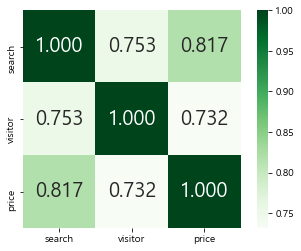

In [9]:
dataheatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.3f', square = True, cmap='Greens')

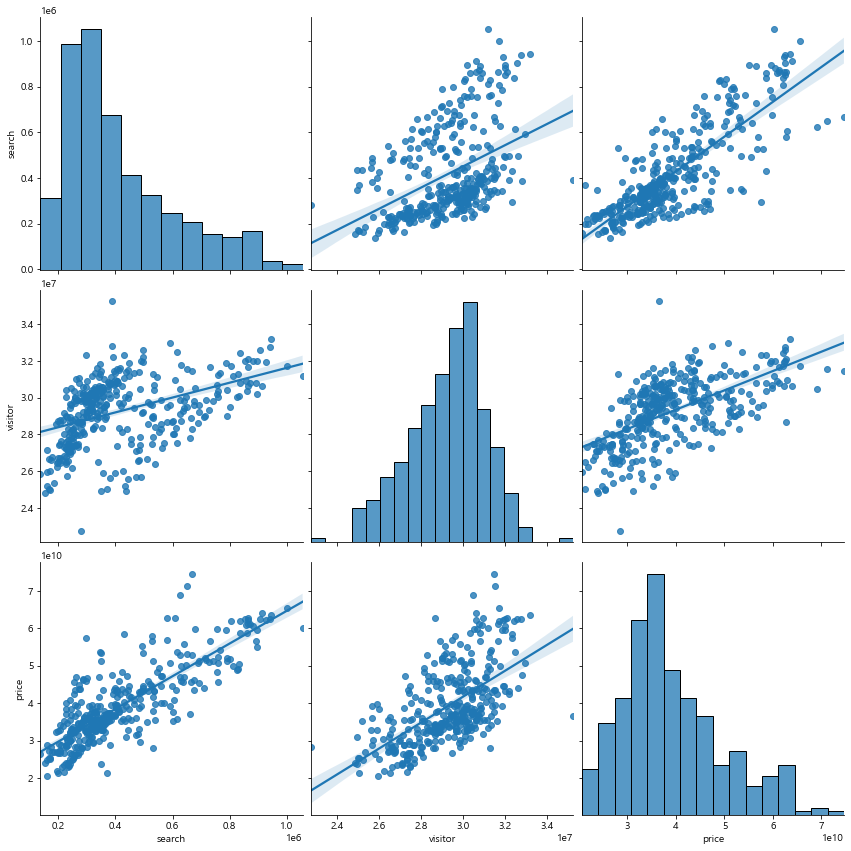

In [40]:
sns.pairplot(data, kind='reg', height=4) 

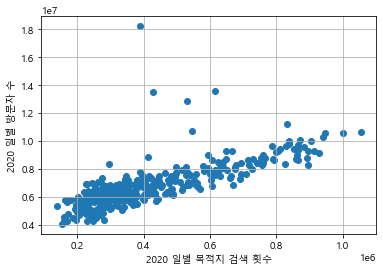

In [10]:
plt.scatter(search2020, visitor2020)
plt.xlabel("2020 일별 목적지 검색 횟수")
plt.ylabel("2020 일별 방문자 수")
plt.grid()
plt.show()

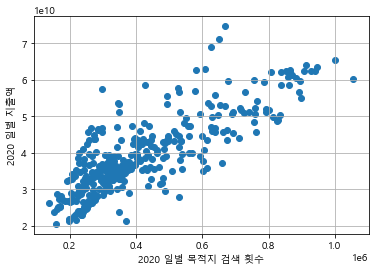

In [11]:
plt.scatter(search2020, price2020)
plt.xlabel("2020 일별 목적지 검색 횟수")
plt.ylabel("2020 일별 지출액")
plt.grid()
plt.show()

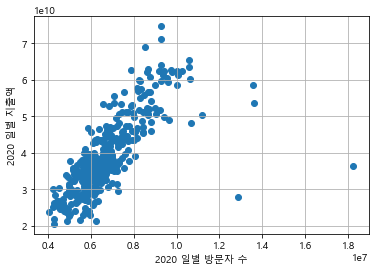

In [12]:
plt.scatter(visitor2020, price2020)
plt.xlabel("2020 일별 방문자 수")
plt.ylabel("2020 일별 지출액")
plt.grid()
plt.show()

In [10]:
sns.pairplot(data, hue=day2020)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().